# **Analysis on Stroke Dataset**

### Data Summary

This dataset is designed to predict the likelihood of a patient experiencing a stroke, using various demographic, lifestyle, and medical factors. Stroke is a significant global health issue, identified by the World Health Organization (WHO) as the second leading cause of death worldwide, responsible for around 11% of all deaths. Each record in the dataset corresponds to a single patient and includes information on several attributes.

**Attribute Details:**
1. **id**: Unique identifier for each patient.
2. **gender**: Categorical variable representing the patient's gender - "Male," "Female," or "Other."
3. **age**: Numeric value indicating the age of the patient.
4. **hypertension**: Binary indicator (0 = No, 1 = Yes) of whether the patient has hypertension.
5. **heart_disease**: Binary indicator (0 = No, 1 = Yes) of whether the patient has a heart condition.
6. **ever_married**: Categorical variable indicating marital status - "No" or "Yes."
7. **work_type**: Type of employment, with categories including "children," "Govt_job," "Never_worked," "Private," and "Self-employed."
8. **Residence_type**: Type of residence, either "Rural" or "Urban."
9. **avg_glucose_level**: Numeric value representing the patient’s average blood glucose level.
10. **bmi**: Numeric value indicating the patient’s Body Mass Index (BMI).
11. **smoking_status**: Categorical variable indicating smoking history - "formerly smoked," "never smoked," "smokes," or "Unknown" (where information is unavailable).
12. **stroke**: Target variable; binary indicator (0 = No, 1 = Yes) of whether the patient has had a stroke.


In [70]:
# Import Python libraries
import pandas as pd

# Data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing libraries
from sklearn.preprocessing import LabelEncoder

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [71]:
# Read data
stroke_df = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke_df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [72]:
# Shape of data
stroke_df.shape

(5110, 12)

In [73]:
# Info of data
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [74]:
# General statistics of Data
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Check for NA values

In [75]:
# Check for null values
stroke_df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


### Handle NA values

Steps to follow:
- First we will check whether bmi column contains outliers or not
- If outliers present, impute NA with median
- If outliers not present, imput NA with mean

This is because, imputing with mean while having outliers can affect the distrbution of data (can lead to skewness).

In [76]:
Q1 = stroke_df['bmi'].quantile(0.25)
Q3 = stroke_df['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = stroke_df[(stroke_df['bmi'] < lower_bound) | (stroke_df['bmi'] > upper_bound)]

print(f"Number of outliers in BMI column: {outliers.shape[0]}")

Number of outliers in BMI column: 110


The bmi contains outliers therefore we will impute NA with median

In [77]:
# Impute BMI: Filling NA with mean
stroke_df['bmi'].fillna(stroke_df['bmi'].median(), inplace=True)

stroke_df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


## Drop Unnecessary column

Drop id column as this contains unique values which doesn't give any pattern

In [78]:
# Drop id column as this contains unique values which doesn't give any pattern
stroke_df.drop('id', axis=1, inplace=True)
stroke_df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


## Encode Categorical Columns

Label Encode categorical columns to convert to numerical form

In [79]:
# Label Encode categorical columns to convert to numerical form

label_encoder = LabelEncoder()

for col in stroke_df.columns:
    if stroke_df[col].dtype == 'object':
        stroke_df[col] = label_encoder.fit_transform(stroke_df[col])

stroke_df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1


## Function for Heatmap (stroke_df.corr())

In [80]:
stroke_df.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.028202,0.020994,0.085447,-0.031005,0.056422,-0.006738,0.055180,-0.026952,-0.062581,0.008929
age,-0.028202,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.238171,0.324296,0.265199,0.245257
hypertension,0.020994,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.174474,0.158293,0.111038,0.127904
heart_disease,0.085447,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.161857,0.036916,0.048460,0.134914
ever_married,-0.031005,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.155068,0.334911,0.259647,0.108340
work_type,0.056422,-0.361642,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.050513,-0.299172,-0.305927,-0.032316
Residence_type,-0.006738,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.004946,-0.000277,0.008237,0.015458
avg_glucose_level,0.055180,0.238171,0.174474,0.161857,0.155068,-0.050513,-0.004946,1.000000,0.166876,0.063437,0.131945
bmi,-0.026952,0.324296,0.158293,0.036916,0.334911,-0.299172,-0.000277,0.166876,1.000000,0.218968,0.036110
smoking_status,-0.062581,0.265199,0.111038,0.048460,0.259647,-0.305927,0.008237,0.063437,0.218968,1.000000,0.028123


In [81]:
# Function to display correlation heatmap
def correlation_heatmap(data):
    """
    Function creates a heatmap to visualise the correlation matrix.

    Parameters:
    - data (DataFrame): The dataset containing the correlation matrix.

    The plot is displayed using Matplotlib.
    """
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='Set2', fmt='.2f', linecolor='black', linewidths=0.5)
    plt.title('Correlation Heatmap - Stroke Dataset')
    plt.show()

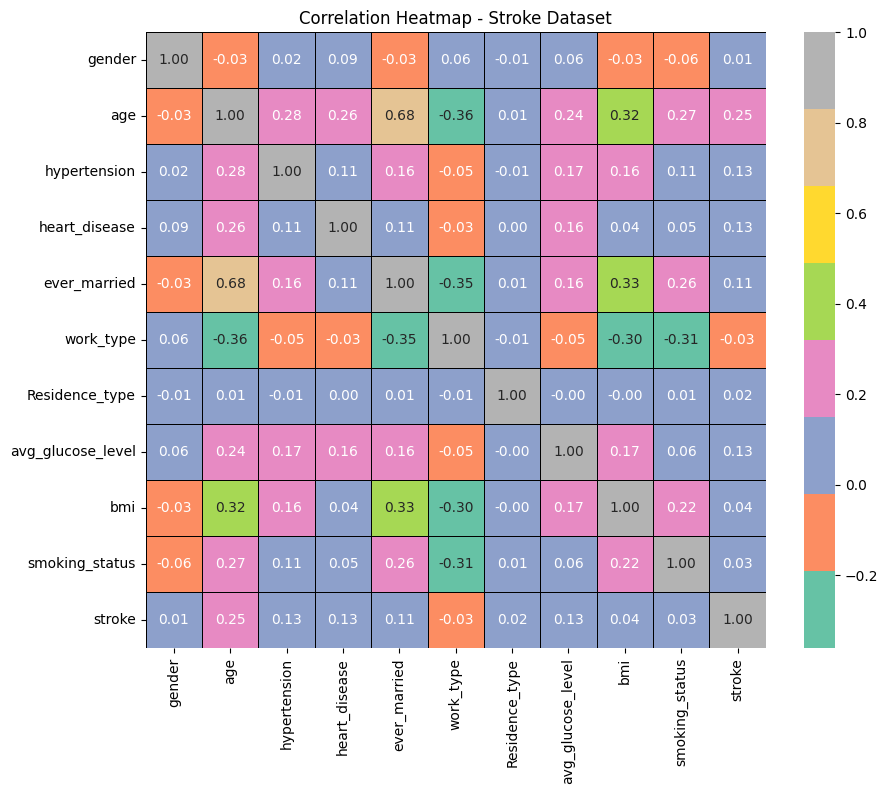

In [82]:
# Call the function
correlation_heatmap(stroke_df)

**Insights:**

- Age and ever_married have a strong positive correlation (0.68). This tells that older individuals are more likely to be married.
- BMI and age have a moderate positive correlation (0.32). This shows a trend of higher BMI with age.
- Work_type is negatively correlated with age (-0.36) and ever_married (-0.35). This shows different job types across age and marital status.
- Stroke has the highest correlation with age (0.25). This suggests age being a significant factor in stroke occurrence.

## Function for line plot (stroke vs bmi)

- 0 represents, patient with **no stroke**

- 1 represents, patient with **stroke**

In [49]:
# Function to create scatter plot
def line_plot(data, x_axis_column, y_axis_column, hue):
    """
    Function creates a line plot to visualise the relationship between two variables.

    Parameters:
    - data (DataFrame): The dataset containing the data to be plotted.
    - x (str): The name of the column to be used as the x-axis.
    - y (str): The name of the column to be used as the y-axis.

    The plot is displayed using Matplotlib.

    """
    plt.figure(figsize=(10, 8))
    sns.lineplot(data=data, x=x_axis_column, y=y_axis_column, hue=hue, palette='Set2')
    plt.title(f'Line Plot - {hue} vs {y_axis_column}')
    plt.xlabel(x_axis_column)
    plt.ylabel(y_axis_column)
    plt.show()

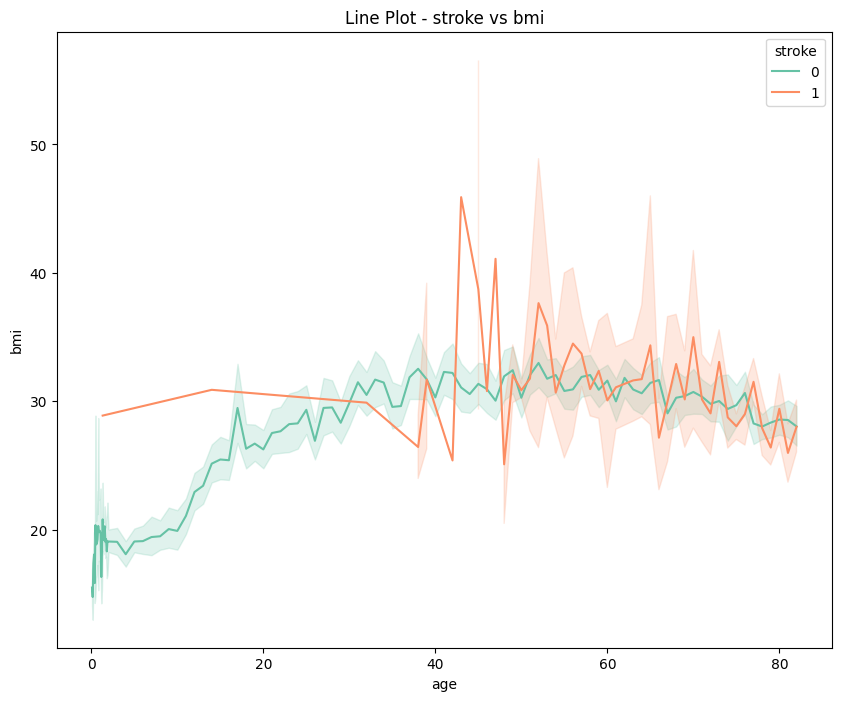

In [50]:
# Call the function
line_plot(stroke_df, 'age', 'bmi', 'stroke')

**Insights:**

- BMI typically rises with age for both individuals who have had a stroke and those who have not, leveling off around the 30-40 range.
- Younger people (under 20) with elevated BMI generally do not experience strokes, as indicated by the green line.
- For those aged 30 to 60, individuals who have had a stroke (represented by the orange line) demonstrate greater variability in BMI, which may imply a potential link between high BMI and stroke risk within this demographic.
- Beyond the age of 60, the BMI patterns for both stroke and non-stroke individuals begin to align, with less distinct differences observed.

## Function for Bar Plot (Frequency distribution of samples)

- 0 represents, patient with **no stroke**

- 1 represents, patient with **stroke**

In [56]:
# Function to create bar chart for stroke frequency distribution
def bar_plot(data, column):
    """
    Function creates a bar plot to show the frequency distribution of classes.
    It also annotates values on each bar.

    Parameters:
    - data (DataFrame): The dataset containing the column to be plotted.
    - column (str): The name of the column to visualize class distribution.

    The plot displays the count of each class in the specified column and includes a legend.
    The plot is displayed using Matplotlib.
    """
    plt.figure(figsize=(10, 8))
    sns.countplot(x=column, hue=column, data=stroke_df, palette='Set2', legend=False)

    # Add data labels on each bar: Annotation
    for p in plt.gca().patches:
        plt.annotate((p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.title(f'Class Distribution - {column.capitalize()}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(loc='upper right', labels=['No Stroke', 'Stroke'])
    plt.show()

----Frequency distribution of data samples with respect to stroke attribute----
stroke
0    4861
1     249
Name: count, dtype: int64


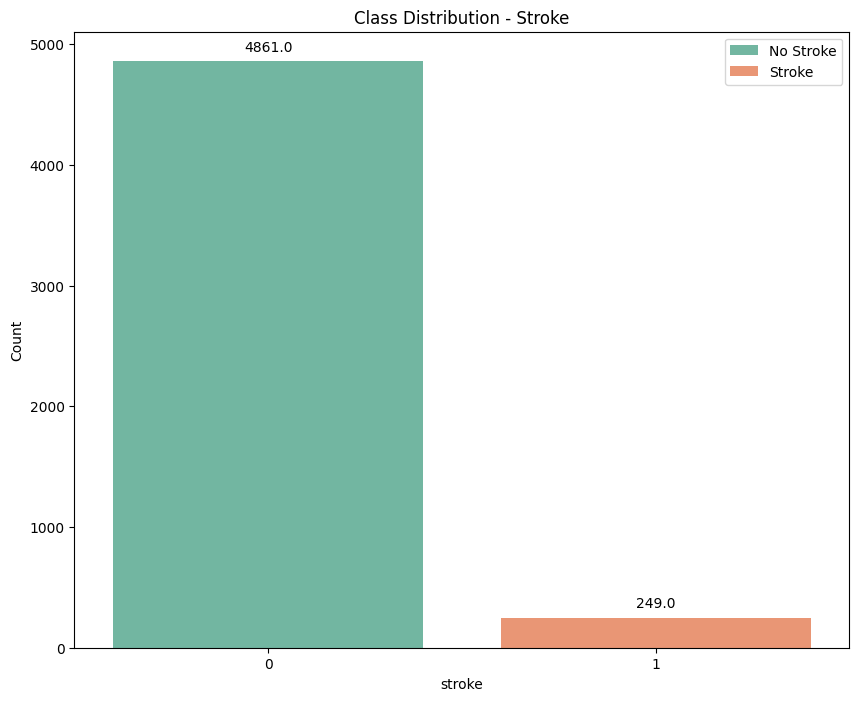

In [57]:
# Call the function
print("----Frequency distribution of data samples with respect to stroke attribute----")
print(stroke_df.stroke.value_counts())

bar_plot(stroke_df, 'stroke')

**Insights:**

- The dataset shows a considerable imbalance, with a much higher number of non-stroke instances (4861) in contrast to stroke instances (249).
- This disparity indicates the necessity for methods such as resampling or weighting to enhance the model's performance concerning the minority class (stroke cases).

# **Final Analysis**

Older individuals are more likely to be married and have a higher BMI; job types vary with age and marital status, while age significantly influences stroke occurrence. BMI increases with age for both stroke and non-stroke individuals, stabilizing around 30-40; younger individuals rarely experience strokes despite higher BMI, while variability in BMI suggests a link to stroke risk for ages 30-60. The dataset is imbalanced, with 4,861 non-stroke cases compared to 249 stroke cases, highlighting the need for resampling or weighting to improve model performance for the minority class.